In [1]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777)  # reproducibility

if "DISPLAY" not in os.environ:
    # remove Travis CI Error
    matplotlib.use('Agg')

import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [4]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

[[ 0.42422978  0.42402812  0.41711537  0.12512324  0.41603138]
 [ 0.4220442   0.42622485  0.42163138  0.16145021  0.41145567]
 [ 0.50865169  0.51715719  0.48918368  0.45005826  0.49029172]
 [ 0.49081734  0.48854207  0.48337349  0.26250784  0.486736  ]
 [ 0.47986612  0.48709686  0.48152786  0.16158466  0.4776721 ]
 [ 0.46730044  0.47367086  0.48445919  0.09538406  0.47962473]
 [ 0.47251664  0.4780788   0.48029243  0.09355562  0.49055392]] -> [ 0.47673945]
[[ 0.4220442   0.42622485  0.42163138  0.16145021  0.41145567]
 [ 0.50865169  0.51715719  0.48918368  0.45005826  0.49029172]
 [ 0.49081734  0.48854207  0.48337349  0.26250784  0.486736  ]
 [ 0.47986612  0.48709686  0.48152786  0.16158466  0.4776721 ]
 [ 0.46730044  0.47367086  0.48445919  0.09538406  0.47962473]
 [ 0.47251664  0.4780788   0.48029243  0.09355562  0.49055392]
 [ 0.48737871  0.48565166  0.48680684  0.12980192  0.47673945]] -> [ 0.49064144]
[[ 0.50865169  0.51715719  0.48918368  0.45005826  0.49029172]
 [ 0.49081734  0.48

 [ 0.62501214  0.64312109  0.63995201  0.11734337  0.6526557 ]] -> [ 0.6227534]
[[ 0.63337563  0.64378601  0.65271648  0.13465985  0.64219292]
 [ 0.64721766  0.657631    0.66950104  0.1399749   0.67215339]
 [ 0.66662556  0.66046355  0.6609327   0.15095456  0.64915832]
 [ 0.64812103  0.64534676  0.6497821   0.12125123  0.64338777]
 [ 0.63317162  0.63786635  0.65054507  0.11711033  0.63615998]
 [ 0.62501214  0.64312109  0.63995201  0.11734337  0.6526557 ]
 [ 0.64500291  0.65190805  0.63543295  0.17865914  0.6227534 ]] -> [ 0.62391925]
[[ 0.64721766  0.657631    0.66950104  0.1399749   0.67215339]
 [ 0.66662556  0.66046355  0.6609327   0.15095456  0.64915832]
 [ 0.64812103  0.64534676  0.6497821   0.12125123  0.64338777]
 [ 0.63317162  0.63786635  0.65054507  0.11711033  0.63615998]
 [ 0.62501214  0.64312109  0.63995201  0.11734337  0.6526557 ]
 [ 0.64500291  0.65190805  0.63543295  0.17865914  0.6227534 ]
 [ 0.60910103  0.62323506  0.62522138  0.15764991  0.62391925]] -> [ 0.60552907]
[[

[[ 0.91044941  0.89938487  0.91789617  0.12081205  0.90947714]
 [ 0.90674843  0.89668234  0.91971547  0.11521018  0.91373231]
 [ 0.90473768  0.90614832  0.92209231  0.08103433  0.90238046]
 [ 0.90995388  0.89871995  0.92176957  0.14673299  0.91067217]
 [ 0.91094476  0.93907013  0.92778501  0.16973201  0.95231962]
 [ 0.9548021   0.95360897  0.96910396  0.1302411   0.96560951]
 [ 0.97613342  0.98213729  0.99034596  0.1332437   1.        ]] -> [ 0.98974125]
[[ 0.90674843  0.89668234  0.91971547  0.11521018  0.91373231]
 [ 0.90473768  0.90614832  0.92209231  0.08103433  0.90238046]
 [ 0.90995388  0.89871995  0.92176957  0.14673299  0.91067217]
 [ 0.91094476  0.93907013  0.92778501  0.16973201  0.95231962]
 [ 0.9548021   0.95360897  0.96910396  0.1302411   0.96560951]
 [ 0.97613342  0.98213729  0.99034596  0.1332437   1.        ]
 [ 1.          0.98858285  0.99606803  0.24437573  0.98974125]] -> [ 0.96397742]
[[ 0.90473768  0.90614832  0.92209231  0.08103433  0.90238046]
 [ 0.90995388  0.89

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 25.398422241210938
[step: 1] loss: 4.741678714752197
[step: 2] loss: 8.296273231506348
[step: 3] loss: 12.308565139770508
[step: 4] loss: 7.661688804626465
[step: 5] loss: 3.1149404048919678
[step: 6] loss: 2.236405611038208
[step: 7] loss: 3.7428994178771973
[step: 8] loss: 5.15886116027832
[step: 9] loss: 5.18191385269165
[step: 10] loss: 3.9376564025878906
[step: 11] loss: 2.312483549118042
[step: 12] loss: 1.2588951587677002
[step: 13] loss: 1.254879117012024
[step: 14] loss: 2.0110325813293457
[step: 15] loss: 2.70407772064209
[step: 16] loss: 2.7113757133483887
[step: 17] loss: 2.1003031730651855
[step: 18] loss: 1.3960527181625366
[step: 19] loss: 1.0561708211898804
[step: 20] loss: 1.1731470823287964
[step: 21] loss: 1.5222394466400146
[step: 22] loss: 1.79441237449646
[step: 23] loss: 1.8049077987670898
[step: 24] loss: 1.5672365427017212
[step: 25] loss: 1.240010380744934
[step: 26] loss: 1.0094523429870605
[step: 27] loss: 0.9757055640220642
[step: 28] loss: 

[step: 244] loss: 0.5534641742706299
[step: 245] loss: 0.5527284145355225
[step: 246] loss: 0.552000880241394
[step: 247] loss: 0.5512806177139282
[step: 248] loss: 0.5505679845809937
[step: 249] loss: 0.5498629808425903
[step: 250] loss: 0.5491649508476257
[step: 251] loss: 0.5484736561775208
[step: 252] loss: 0.5477892160415649
[step: 253] loss: 0.5471111536026001
[step: 254] loss: 0.5464391708374023
[step: 255] loss: 0.5457733869552612
[step: 256] loss: 0.545113205909729
[step: 257] loss: 0.5444585084915161
[step: 258] loss: 0.5438091158866882
[step: 259] loss: 0.5431647896766663
[step: 260] loss: 0.5425254702568054
[step: 261] loss: 0.5418906211853027
[step: 262] loss: 0.5412603616714478
[step: 263] loss: 0.5406340956687927
[step: 264] loss: 0.5400120615959167
[step: 265] loss: 0.5393937230110168
[step: 266] loss: 0.5387789011001587
[step: 267] loss: 0.5381675958633423
[step: 268] loss: 0.5375596880912781
[step: 269] loss: 0.5369545221328735
[step: 270] loss: 0.5363524556159973
[st

[step: 470] loss: 0.4318811595439911
[step: 471] loss: 0.4315997362136841
[step: 472] loss: 0.431322306394577
[step: 473] loss: 0.43104812502861023
[step: 474] loss: 0.43077749013900757
[step: 475] loss: 0.4305104613304138
[step: 476] loss: 0.43024682998657227
[step: 477] loss: 0.4299865663051605
[step: 478] loss: 0.4297296106815338
[step: 479] loss: 0.42947590351104736
[step: 480] loss: 0.4292256236076355
[step: 481] loss: 0.42897841334342957
[step: 482] loss: 0.4287341833114624
[step: 483] loss: 0.4284932017326355
[step: 484] loss: 0.4282552897930145
[step: 485] loss: 0.4280203580856323
[step: 486] loss: 0.42778828740119934
[step: 487] loss: 0.42755916714668274
[step: 488] loss: 0.42733287811279297
[step: 489] loss: 0.4271092414855957
[step: 490] loss: 0.4268883466720581
[step: 491] loss: 0.42667028307914734
[step: 492] loss: 0.4264546036720276
[step: 493] loss: 0.4262416362762451
[step: 494] loss: 0.4260312616825104
[step: 495] loss: 0.42582327127456665
[step: 496] loss: 0.425617873

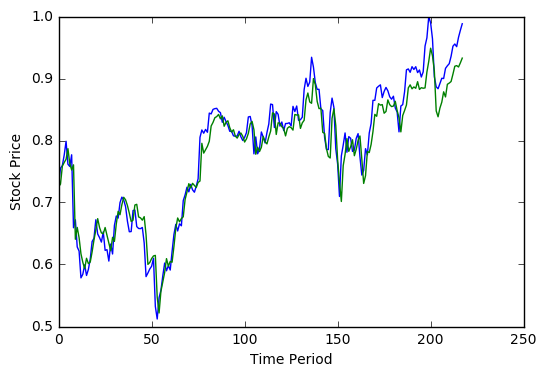

In [6]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()